# 회귀분석 실습과제 (당뇨병 진행도 예측)

- 사이킷런이 제공하는 당뇨병 진행도 데이터를 사용해서 회귀분석 실습
- 데이터 건수: 442
- 독립변수: 나이, 성별, bmi, bp, 6종의 혈액검사수치(s1~s6)
- 종속변수: 1년 뒤 측정한 당뇨병 진행도

독립변수의 값은 모두 표준화(StandardScaler)가 되어 있으므로 본래의 값이 아님: 예) 나이: 0.038

https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html


In [ ]:
# 필요한 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 데이터 로드
- sklearn.datasets에서 당뇨병 데이터(load_diabetes)를 읽어온다.
- data, target에 각각 독립변수와 종속변수를 저장한다.
- feature_names에 독립변수의 이름을 저장한다.
- data, target의 shape와 feature_names를 출력한다.
- data의 첫 5건의 값을 출력한다.
- target의 첫 5건의 값을 출력한다.

In [ ]:

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data  = diabetes.data
target = diabetes.target
# pandas를 사용하고 싶은 경우 아래 코드를 이용
#df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#df["target"] = diabetes.target
feature_names = diabetes.feature_names
print(data.shape, target.shape)
print(feature_names)
print(data[:5]) 
print(target[:5])

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


## 여기서부터는 각 셀의 내용을 읽고 출력 예시와 같은 출력이 나오도록 코드 셀을 추가하시오.

### 2. 데이터에 대한 정보를 얻기 위해 그래프 그리기
- data set에서 X에 해당하는 각각의 값과 y의 값으로 그래프를 그려서 각 x값과 y의 관계를 직관적으로 살펴본다.
- subplot은 2 x 5 행렬로 그리고 figsize는 (20, 8)로 지정한다.
- set_title로 feature_names를 출력해서 각 그래프의 독립변수를 알 수 있도록 한다.

**출력 예시**

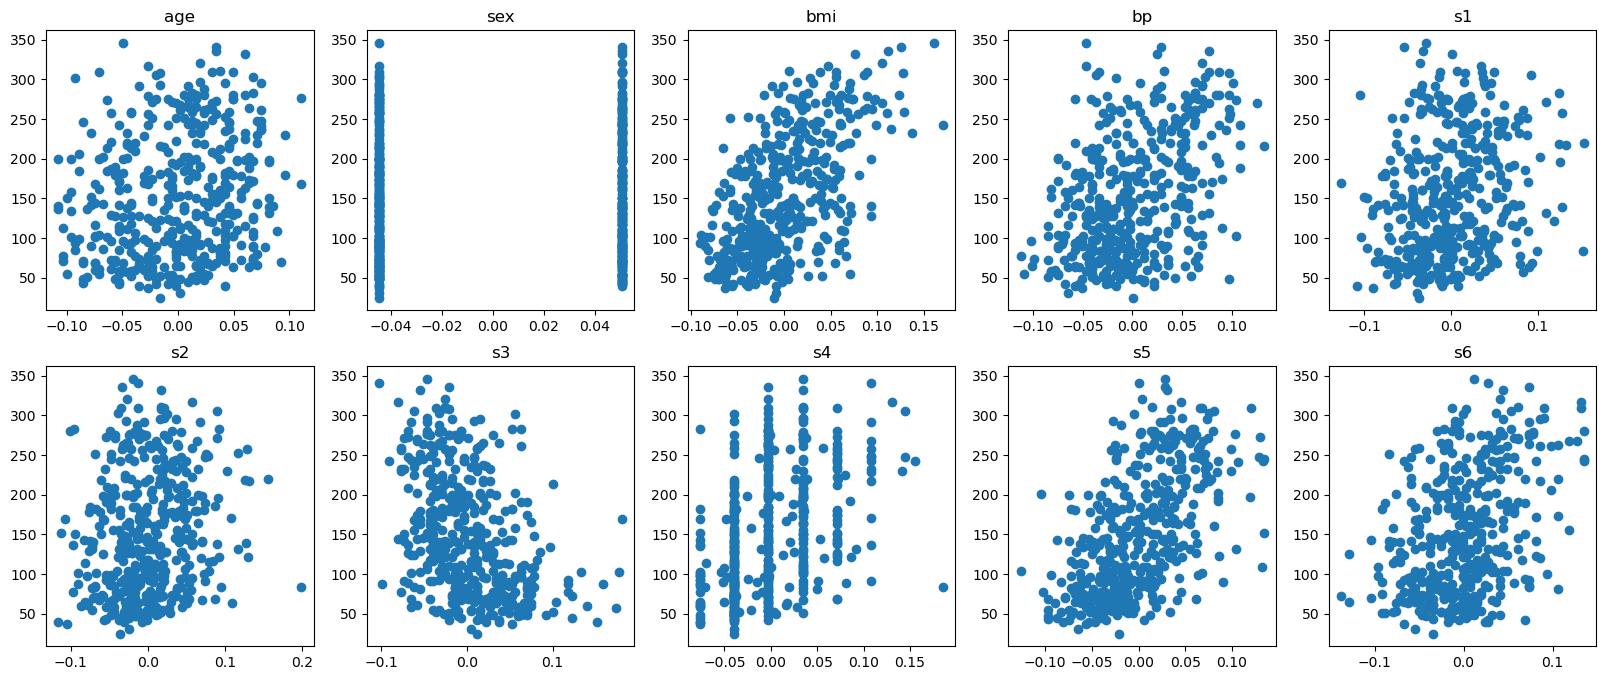

### 3. 데이터셋 분리
- train_test_split을 이용하여 train set과 test set으로 분리한다.
- X_train, X_test, Y_train, Y_test으로 이름을 지정한다.
- test_size의 비율은 0.2, random_state는 2024를 설정한다.
- 분리된 data set(X_train, X_test, Y_train, Y_test)의 크기를 출력한다.

**출력 예시**
```
(353, 10) (353,)
(89, 10) (89,)
```

### 4. 단순회귀분석(Simple linear regression) 실행

- 독립변수 중에서 s5만 이용해 단순회귀분석 모형을 학습한다.
- 학습으로 얻어진 계수(coef_)와 상수(intercept_)를 출력한다.

**출력 예시**
```
coef_ [883.79846797]
intercept_ 153.54634501060275
```

- train set과 test set 각각에 대해 R2 score를 출력한다.

**출력 예시**
```
R2 score for train set 0.30572147870696353
R2 score for test set 0.37051066915025876
```

### 5. 다중회귀분석(Multiple linear regression) 실행
- 전체 데이터셋으로 회귀분석을 실행한다.
- 학습으로 얻어진 계수(coef_)와 상수(intercept_)를 출력한다.

**출력 예시**
```
coef_ [ -10.96023563 -236.92984785  511.8289415   369.85561743 -826.70881193
  483.38933606   97.45784245  135.10722892  745.51961547   58.43264756]
intercept_ 153.80722393185206
```

- train set과 test set 각각에 대해 R2 score를 출력한다.

**출력 예시**
```
R2 score for train set: 0.523
R2 score for test set: 0.485
```

- predict()를 이용해 X_test에 대해 Y를 예측(predicted)한다.
- 예측한 Y(predict)와 Y_test로 scatter graph를 그리고 y=x 에 해당하는 점선을 붉은 색으로 표시한다.

**출력 예시**

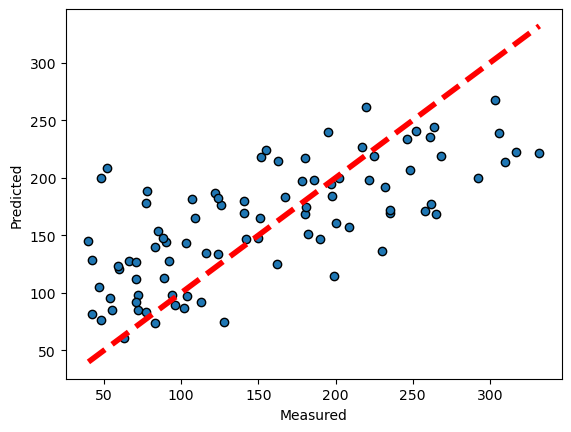

### 6. 다항식(polynomial) features 변환
- X_train과 X_test를 2차항까지 확장해서 polynomial feature로 변환한다.
- X_train과 확장된 X_trtin_poly의 크기를 비교하여 출력한다.

**출력 예시**
```
X_train vs X_train_poly:  (353, 10) (353, 66)
```

- X_train_poly로 다중회귀분석 모델을 학습하고 train set과 test set에 대한 R2 score를 출력한다.

**출력 예시**
```
R2 score for polynomial train set: 0.610
R2 score for polynomial test set: 0.456
```

### 7. 릿지회귀(Ridge regression)
- X_train_poly를 이용해 ridge 모형을 학습한다.
- 이 때 alpha는 0.005를 설정한다.
- train set과 test set에 대해 R2 Score를 출력한다.

**출력 예시**
```
Ridge R2 score for polynomial train set: 0.553
Ridge R2 score for polynomial test set: 0.508
```

### 8. 라쏘회귀(Lasso regression)
- X_train_poly를 이용해 lasso 모형을 학습한다.
- 이 때 alpha는 0.005를 설정한다.
- train set과 test set에 대해 R2 Score를 출력한다.

**출력 예시**
```
Lasso R2 score for polynomial train set: 0.560
Lasso R2 score for polynomial test set: 0.511
Used features count: 22
```